In [ ]:
pip install Boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Load the dataset
data = pd.read_csv("/content/X-IIoTID dataset.csv", low_memory=False)
# Check the sample size of the dataset
print(f"Sample size of the dataset: {data.shape[0]} rows and {data.shape[1]} columns")

NameError: name 'pd' is not defined

In [ ]:
import numpy as np

# Display the number of selected features for each task
print(f"Number of selected features for Binary Classification (class3): {np.sum(selected_features_binary)}")
print(f"Number of selected features for Multi-class-a (class2): {np.sum(selected_features_a)}")
print(f"Number of selected features for Multi-class-b (class1): {np.sum(selected_features_b)}")

# Optionally, display the indices of the selected features
print(f"Indices of selected features for Binary Classification (class3): {np.where(selected_features_binary)[0]}")
print(f"Indices of selected features for Multi-class-a (class2): {np.where(selected_features_a)[0]}")
print(f"Indices of selected features for Multi-class-b (class1): {np.where(selected_features_b)[0]}")

Number of selected features for Binary Classification (class3): 5
Number of selected features for Multi-class-a (class2): 5
Number of selected features for Multi-class-b (class1): 5
Indices of selected features for Binary Classification (class3): [ 0  2  7  9 21]
Indices of selected features for Multi-class-a (class2): [0 1 2 7 9]
Indices of selected features for Multi-class-b (class1): [ 0  1  2  7 41]


In [ ]:
# Function to calculate and display accuracy for each task
def test_accuracy(X_train, X_test, y_train, y_test, task_name):
    # Ensure y_train and y_test are 1D arrays
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    models = {
        "Decision Tree": RandomForestClassifier(n_estimators=10, random_state=42),  # Reduce n_estimators for speed
        "ANN": build_ann_multiclass(X_train.shape[1], len(np.unique(y_train))) if len(np.unique(y_train)) > 2 else build_ann(X_train.shape[1])
    }

    for name, model in models.items():
        if name == "ANN":
            if len(np.unique(y_train)) > 2:  # Multi-class
                y_train_onehot = to_categorical(y_train, num_classes=len(np.unique(y_train)))
                y_test_onehot = to_categorical(y_test, num_classes=len(np.unique(y_test)))

                model.fit(X_train, y_train_onehot, epochs=5, batch_size=32, verbose=1)  # Reduce epochs
                y_pred = model.predict(X_test)
                y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
            else:  # Binary classification
                model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)  # Reduce epochs
                y_pred = model.predict(X_test)
                y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels
        else:
            model.fit(X_train, y_train)
            y_pred_classes = model.predict(X_test)

        # Calculate accuracy
        accuracy = np.mean(y_pred_classes == y_test) * 100
        print(f"Accuracy of {name} for {task_name}: {accuracy:.2f}%")

# Test accuracy for Binary Classification (class3)
test_accuracy(X_train_scaled, X_test_scaled, y_train_binary, y_test_binary, "Binary Classification (class3)")

# Test accuracy for Multi-class-a (class2)
test_accuracy(X_train_a_scaled, X_test_a_scaled, y_train_multi_a, y_test_multi_a, "Multi-class-a (class2)")

# Test accuracy for Multi-class-b (class1)
test_accuracy(X_train_b_scaled, X_test_b_scaled, y_train_multi_b, y_test_multi_b, "Multi-class-b (class1)")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy of Decision Tree for Binary Classification (class3): 99.87%
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8660 - loss: 0.3581
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9795 - loss: 0.0886
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9863 - loss: 0.0570
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9902 - loss: 0.0454
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0385
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy of ANN for Binary Classification (class3): 50.81%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy of Decision Tree for Multi-class-a (class2): 99.94%
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6365 - loss: 1.1257
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9261 - loss: 0.2501
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9679 - loss: 0.1348
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9817 - loss: 0.0913
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9866 - loss: 0.0656
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy of ANN for Multi-class-a (class2): 99.02%


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy of Decision Tree for Multi-class-b (class1): 99.95%
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6116 - loss: 1.3871
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9077 - loss: 0.3162
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1563
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9787 - loss: 0.0977
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9881 - loss: 0.0681
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy of ANN for Multi-class-b (class1): 98.98%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from imblearn.over_sampling import SMOTE

# -------------------------------
# Step 1: Load and Preprocess Data
# -------------------------------
# Load the dataset
data = pd.read_csv("/content/X-IIoTID dataset.csv", low_memory=False)

# Reduce dataset size for faster processing
sample_size = 50000  # Adjust this value as needed
data = data.sample(n=sample_size, random_state=42)

# Replace missing or invalid values (e.g., '-') with NaN and drop rows with NaN
data.replace('-', np.nan, inplace=True)
data.dropna(inplace=True)

# Convert categorical columns to numeric using Label Encoding (for model training)
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le  # Save the encoder for later use

# Split features and targets
X = data.iloc[:, :-3]  # Assuming last 3 columns are class1, class2, class3
y_binary = data['class3']  # Binary classification target
y_multiclass_a = data['class2']  # Multi-class-a target
y_multiclass_b = data['class1']  # Multi-class-b target

# -------------------------------
# Step 2: Split Data into Train and Test Sets
# -------------------------------
# Split into train and test sets for each target
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)
X_train_a, X_test_a, y_train_multi_a, y_test_multi_a = train_test_split(
    X, y_multiclass_a, test_size=0.3, random_state=42, stratify=y_multiclass_a
)
X_train_b, X_test_b, y_train_multi_b, y_test_multi_b = train_test_split(
    X, y_multiclass_b, test_size=0.3, random_state=42, stratify=y_multiclass_b
)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_a_scaled = scaler.fit_transform(X_train_a)
X_test_a_scaled = scaler.transform(X_test_a)

X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_b_scaled = scaler.transform(X_test_b)

# -------------------------------
# Step 3: Feature Selection with IGRF-RFE
# -------------------------------
# IGRF-RFE
def igrf_rfe(X, y, n_features=5):  # Reduce number of features for faster processing
    rf = RandomForestClassifier(n_estimators=10, random_state=42)  # Reduce n_estimators for speed
    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    rfe.fit(X, y)
    return rfe.support_

# Apply feature selection for binary classification
selected_features_binary = igrf_rfe(X_train_scaled, y_train_binary)
selected_features_a = igrf_rfe(X_train_a_scaled, y_train_multi_a)
selected_features_b = igrf_rfe(X_train_b_scaled, y_train_multi_b)

# Filter the datasets to include only selected features
X_train_scaled = X_train_scaled[:, selected_features_binary]
X_test_scaled = X_test_scaled[:, selected_features_binary]

X_train_a_scaled = X_train_a_scaled[:, selected_features_a]
X_test_a_scaled = X_test_a_scaled[:, selected_features_a]

X_train_b_scaled = X_train_b_scaled[:, selected_features_b]
X_test_b_scaled = X_test_b_scaled[:, selected_features_b]

# -------------------------------
# Step 4: ANN Models with Improvements
# -------------------------------
# ANN Model for Binary Classification
def build_ann(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Use Input layer
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ANN Model for Multi-class Classification
def build_ann_multiclass(input_dim, num_classes):
    model = Sequential([
        Input(shape=(input_dim,)),  # Use Input layer
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# -------------------------------
# Step 5: Train and Evaluate Models with Class Weights
# -------------------------------
# Train and evaluate models for binary classification
def train_and_evaluate_models(X_train, X_test, y_train, y_test, task_name):
    # Ensure y_train and y_test are 1D arrays
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    models = {
        "Decision Tree": RandomForestClassifier(n_estimators=10, random_state=42),  # Reduce n_estimators for speed
        "ANN": build_ann(X_train.shape[1])
    }

    for name, model in models.items():
        if name == "ANN":
            # Handle class imbalance using class weights
            class_weights = {0: 1.0, 1: len(y_train) / sum(y_train == 1)}
            model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, class_weight=class_weights)  # Increase epochs
            y_pred = model.predict(X_test)
            y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_test) * 100
        print(f"Accuracy of {name} for {task_name}: {accuracy:.2f}%")
        print(f"{name} Classification Report for {task_name}:\n", classification_report(y_test, y_pred))

# Train and evaluate for class3 (binary classification)
train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train_binary, y_test_binary, "Binary Classification (class3)")

# Train and evaluate for class2 (multi-class-a)
def train_and_evaluate_multiclass(X_train, X_test, y_train, y_test, num_classes, task_name):
    models = {
        "Decision Tree": RandomForestClassifier(max_depth=5, random_state=42),  # Limit depth to prevent overfitting
        "ANN": build_ann_multiclass(X_train.shape[1], num_classes)
    }

    for name, model in models.items():
        if name == "ANN":
            # Convert labels to one-hot encoding
            y_train_onehot = to_categorical(y_train, num_classes=num_classes)
            y_test_onehot = to_categorical(y_test, num_classes=num_classes)

            model.fit(X_train, y_train_onehot, epochs=20, batch_size=32, verbose=1)  # Increase epochs
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
        else:
            model.fit(X_train, y_train)
            y_pred_classes = model.predict(X_test)

        # Calculate accuracy
        accuracy = np.mean(y_pred_classes == y_test) * 100
        print(f"Accuracy of {name} for {task_name}: {accuracy:.2f}%")
        print(f"{name} Classification Report for {task_name}:\n", classification_report(y_test, y_pred_classes))

# Train and evaluate for class2 (multi-class-a)
train_and_evaluate_multiclass(X_train_a_scaled, X_test_a_scaled, y_train_multi_a, y_test_multi_a, num_classes=len(np.unique(y_train_multi_a)), task_name="Multi-class-a (class2)")

# Train and evaluate for class1 (multi-class-b)
train_and_evaluate_multiclass(X_train_b_scaled, X_test_b_scaled, y_train_multi_b, y_test_multi_b, num_classes=len(np.unique(y_train_multi_b)), task_name="Multi-class-b (class1)")

Accuracy of Decision Tree for Binary Classification (class3): 99.87%
Decision Tree Classification Report for Binary Classification (class3):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4772
           1       1.00      1.00      1.00      6155

    accuracy                           1.00     10927
   macro avg       1.00      1.00      1.00     10927
weighted avg       1.00      1.00      1.00     10927

Epoch 1/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8163 - loss: 0.5325
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9743 - loss: 0.1276
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9882 - loss: 0.0738
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9895 - loss: 0.0582
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0472
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9916 - loss: 0.0411
Epoch 7/20
797/

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6573 - loss: 1.0737
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9359 - loss: 0.2190
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9685 - loss: 0.1161
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9812 - loss: 0.0744
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9883 - loss: 0.0582
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9903 - loss: 0.0463
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9925 - loss: 0.0368
Epoch 8/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9935 - loss: 0.0316
Epoch 9/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9923 - loss: 0.0339
Epoch 10/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0259
Epoch 11/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0257
Epoch 12/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6840 - loss: 1.2512
Epoch 2/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9237 - loss: 0.2895
Epoch 3/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9708 - loss: 0.1472
Epoch 4/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9812 - loss: 0.0964
Epoch 5/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0748
Epoch 6/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0623
Epoch 7/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9914 - loss: 0.0440
Epoch 8/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0424
Epoch 9/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0363
Epoch 10/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9931 - loss: 0.0295
Epoch 11/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9935 - loss: 0.0245
Epoch 12/20
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/X-IIoTID dataset.csv", low_memory=False)

# Fetch unique attack names for class1, class2, and class3
class1_attack_names = data['class1'].unique()
class2_attack_names = data['class2'].unique()
class3_attack_names = data['class3'].unique()

# Display the attack names
print("Unique attack names in class1:")
print(class1_attack_names)

print("\nUnique attack names in class2:")
print(class2_attack_names)

print("\nUnique attack names in class3:")
print(class3_attack_names)

Unique attack names in class1:
['Scanning_vulnerability' 'Normal' 'RDOS' 'Generic_scanning' 'BruteForce'
 'Discovering_resources' 'MQTT_cloud_broker_subscription' 'Exfiltration'
 'insider_malcious' 'Dictionary' 'Modbus_register_reading' 'Reverse_shell'
 'False_data_injection' 'fuzzing' 'TCP Relay' 'MitM' 'C&C'
 'Fake_notification' 'crypto-ransomware']

Unique attack names in class2:
['Reconnaissance' 'Normal' 'RDOS' 'Weaponization' 'Lateral _movement'
 'Exfiltration' 'Exploitation' 'Tampering' 'C&C' 'crypto-ransomware']

Unique attack names in class3:
['Attack' 'Normal']


Binary Classification (class3):


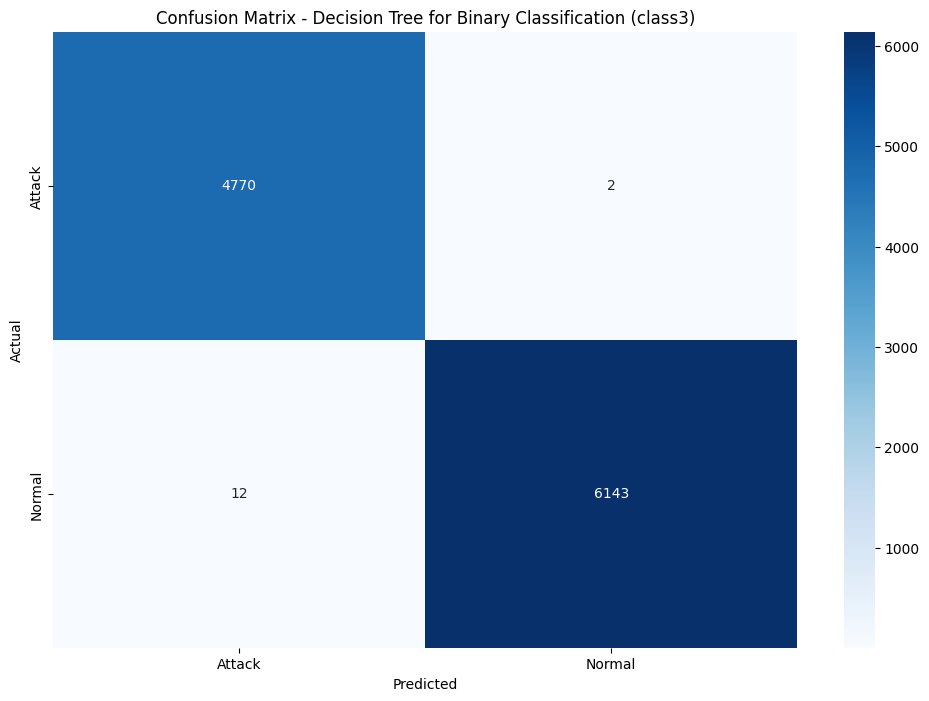

Classification Report - Decision Tree for Binary Classification (class3):

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      4772
      Normal       1.00      1.00      1.00      6155

    accuracy                           1.00     10927
   macro avg       1.00      1.00      1.00     10927
weighted avg       1.00      1.00      1.00     10927

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8400 - loss: 0.3665
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9828 - loss: 0.0845
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9909 - loss: 0.0514
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9913 - loss: 0.0415
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0358
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9934 - loss: 0.0335
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9932 - loss: 0.0

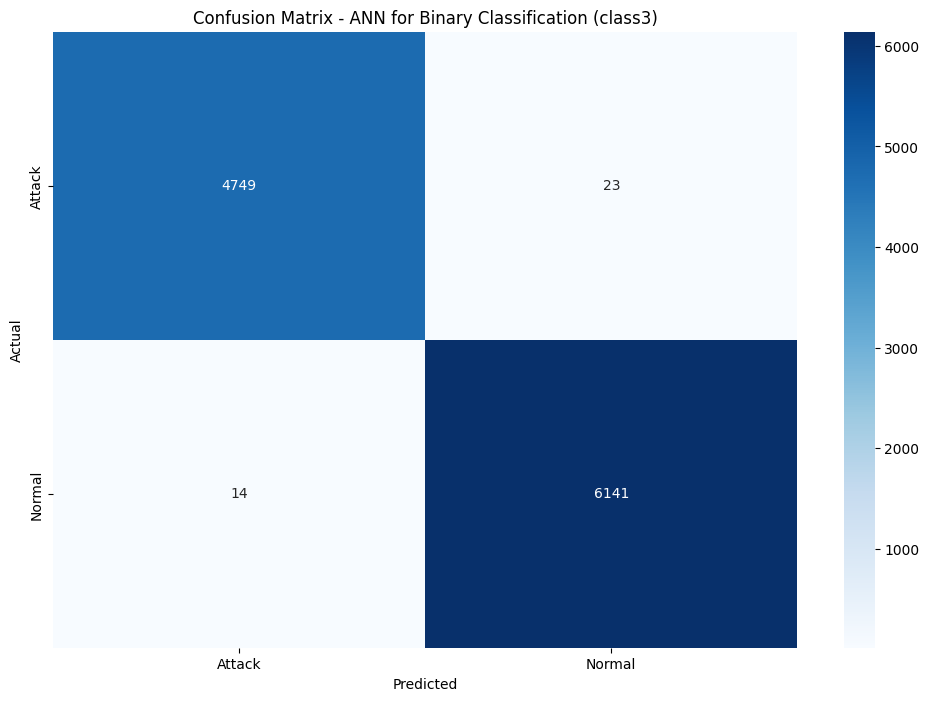

Classification Report - ANN for Binary Classification (class3):

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      4772
      Normal       1.00      1.00      1.00      6155

    accuracy                           1.00     10927
   macro avg       1.00      1.00      1.00     10927
weighted avg       1.00      1.00      1.00     10927

Multi-class-a (class2):


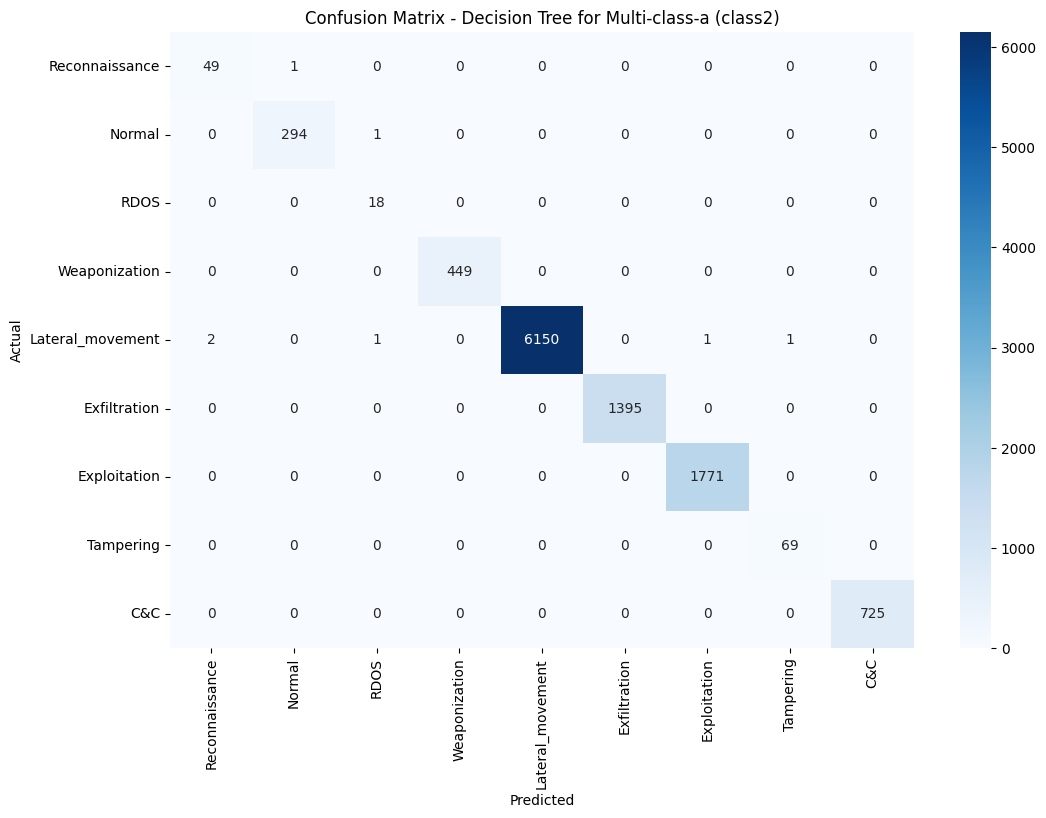

Classification Report - Decision Tree for Multi-class-a (class2):

                  precision    recall  f1-score   support

  Reconnaissance       0.96      0.98      0.97        50
          Normal       1.00      1.00      1.00       295
            RDOS       0.90      1.00      0.95        18
   Weaponization       1.00      1.00      1.00       449
Lateral_movement       1.00      1.00      1.00      6155
    Exfiltration       1.00      1.00      1.00      1395
    Exploitation       1.00      1.00      1.00      1771
       Tampering       0.99      1.00      0.99        69
             C&C       1.00      1.00      1.00       725

        accuracy                           1.00     10927
       macro avg       0.98      1.00      0.99     10927
    weighted avg       1.00      1.00      1.00     10927

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6148 - loss: 1.1699
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9360 - loss: 0.2182
Epoc

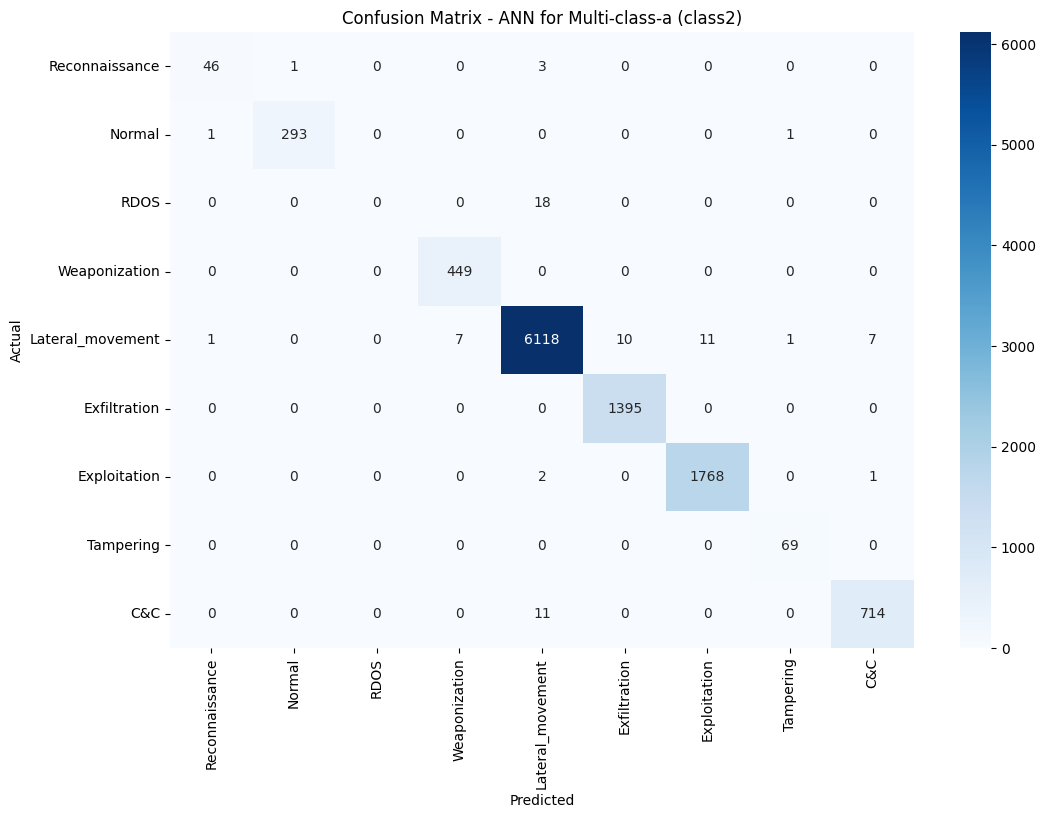

Classification Report - ANN for Multi-class-a (class2):

                  precision    recall  f1-score   support

  Reconnaissance       0.96      0.92      0.94        50
          Normal       1.00      0.99      0.99       295
            RDOS       0.00      0.00      0.00        18
   Weaponization       0.98      1.00      0.99       449
Lateral_movement       0.99      0.99      0.99      6155
    Exfiltration       0.99      1.00      1.00      1395
    Exploitation       0.99      1.00      1.00      1771
       Tampering       0.97      1.00      0.99        69
             C&C       0.99      0.98      0.99       725

        accuracy                           0.99     10927
       macro avg       0.88      0.88      0.88     10927
    weighted avg       0.99      0.99      0.99     10927

Multi-class-b (class1):


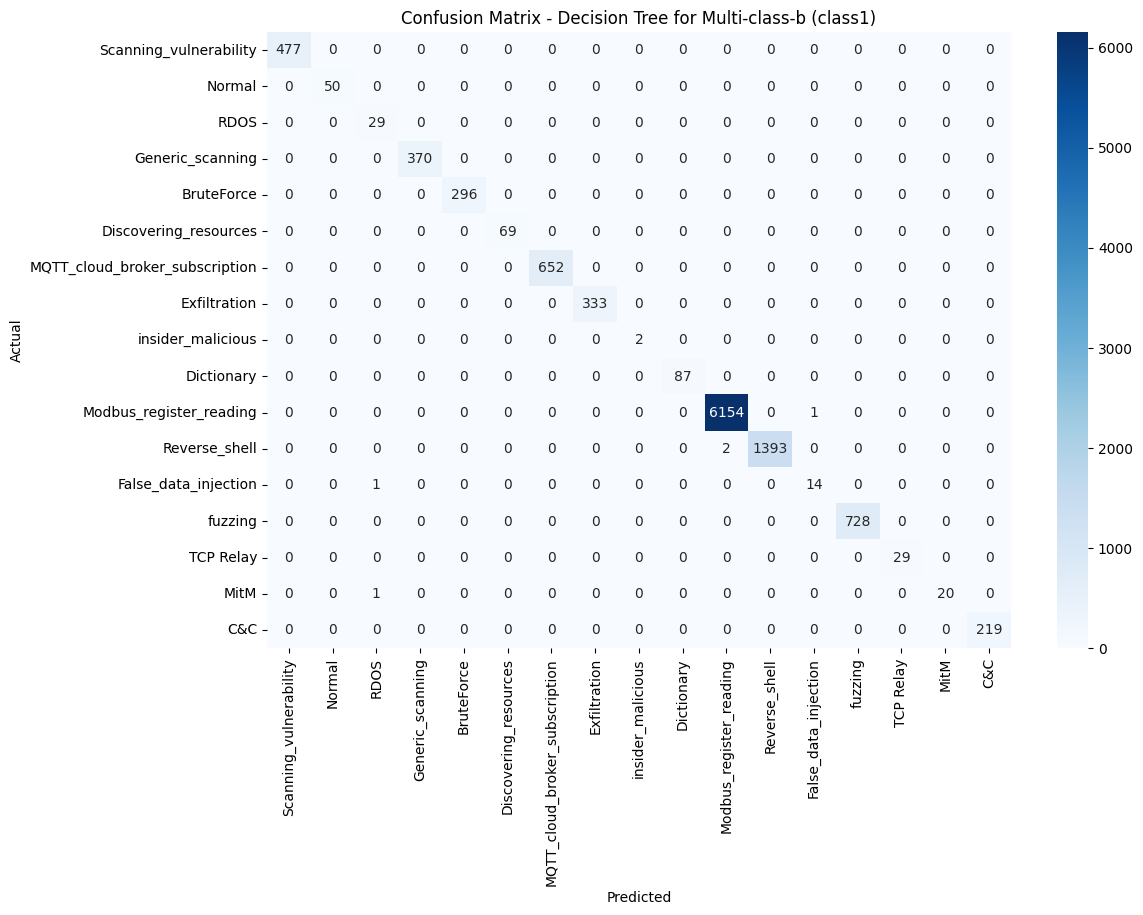

Classification Report - Decision Tree for Multi-class-b (class1):

                                precision    recall  f1-score   support

        Scanning_vulnerability       1.00      1.00      1.00       477
                        Normal       1.00      1.00      1.00        50
                          RDOS       0.94      1.00      0.97        29
              Generic_scanning       1.00      1.00      1.00       370
                    BruteForce       1.00      1.00      1.00       296
         Discovering_resources       1.00      1.00      1.00        69
MQTT_cloud_broker_subscription       1.00      1.00      1.00       652
                  Exfiltration       1.00      1.00      1.00       333
             insider_malicious       1.00      1.00      1.00         2
                    Dictionary       1.00      1.00      1.00        87
       Modbus_register_reading       1.00      1.00      1.00      6155
                 Reverse_shell       1.00      1.00      1.00      1

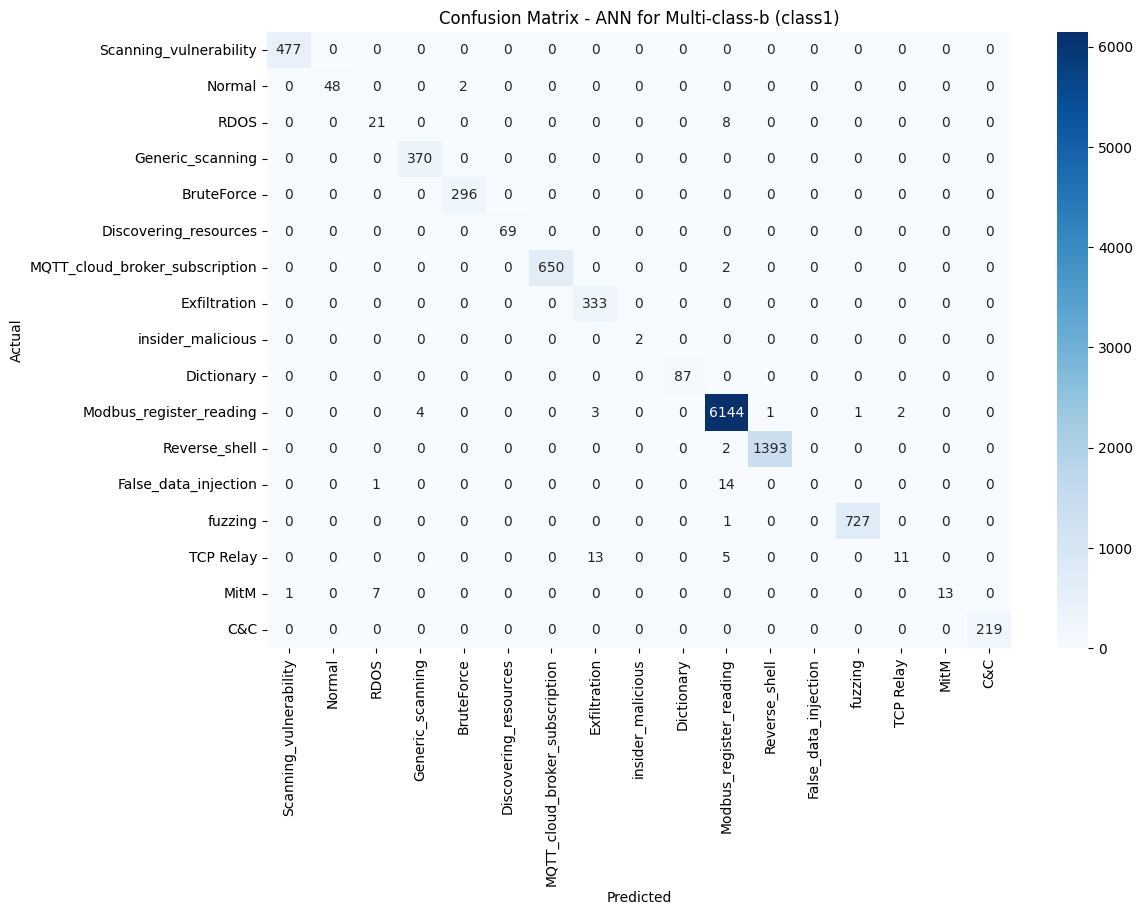

Classification Report - ANN for Multi-class-b (class1):

                                precision    recall  f1-score   support

        Scanning_vulnerability       1.00      1.00      1.00       477
                        Normal       1.00      0.96      0.98        50
                          RDOS       0.72      0.72      0.72        29
              Generic_scanning       0.99      1.00      0.99       370
                    BruteForce       0.99      1.00      1.00       296
         Discovering_resources       1.00      1.00      1.00        69
MQTT_cloud_broker_subscription       1.00      1.00      1.00       652
                  Exfiltration       0.95      1.00      0.98       333
             insider_malicious       1.00      1.00      1.00         2
                    Dictionary       1.00      1.00      1.00        87
       Modbus_register_reading       0.99      1.00      1.00      6155
                 Reverse_shell       1.00      1.00      1.00      1395
      

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

# Define dictionaries to map class indices to attack names
class1_labels_dict = {
    0: "Scanning_vulnerability",
    1: "Normal",
    2: "RDOS",
    3: "Generic_scanning",
    4: "BruteForce",
    5: "Discovering_resources",
    6: "MQTT_cloud_broker_subscription",
    7: "Exfiltration",
    8: "insider_malicious",
    9: "Dictionary",
    10: "Modbus_register_reading",
    11: "Reverse_shell",
    12: "False_data_injection",
    13: "fuzzing",
    14: "TCP Relay",
    15: "MitM",
    16: "C&C",
    17: "Fake_notification",
    18: "crypto-ransomware"
}

class2_labels_dict = {
    0: "Reconnaissance",
    1: "Normal",
    2: "RDOS",
    3: "Weaponization",
    4: "Lateral_movement",
    5: "Exfiltration",
    6: "Exploitation",
    7: "Tampering",
    8: "C&C",
    9: "crypto-ransomware"
}

class3_labels_dict = {
    0: "Attack",
    1: "Normal"
}

# Function to map class indices to names
def map_class_labels(class_indices, class_labels_dict):
    return [class_labels_dict[i] for i in class_indices]

# Function to plot confusion matrix with named labels
def plot_confusion_matrix_named_labels(y_true, y_pred, task_name, model_name, class_labels_dict):
    # Map class indices to names
    class_labels = map_class_labels(np.unique(y_true), class_labels_dict)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - {model_name} for {task_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Function to display classification report
def display_classification_report_named_labels(y_true, y_pred, task_name, model_name, class_labels_dict):
    # Map class indices to names
    class_labels = map_class_labels(np.unique(y_true), class_labels_dict)

    # Display classification report
    report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=0)
    print(f"Classification Report - {model_name} for {task_name}:\n")
    print(report)

# ANN Model for Binary Classification
def build_ann(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # Use Input layer
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ANN Model for Multi-class Classification
def build_ann_multiclass(input_dim, num_classes):
    model = Sequential([
        Input(shape=(input_dim,)),  # Use Input layer
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to evaluate and visualize model performance
def evaluate_and_visualize_named_labels(X_train, X_test, y_train, y_test, task_name, model_name, model, class_labels_dict, is_ann=False, num_classes=None):
    if is_ann:
        if num_classes > 2:  # Multi-class
            y_train_onehot = to_categorical(y_train, num_classes=num_classes)
            y_test_onehot = to_categorical(y_test, num_classes=num_classes)
            model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, verbose=1)  # Reduce epochs for faster training
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
        else:  # Binary classification
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)  # Reduce epochs for faster training
            y_pred = model.predict(X_test)
            y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels
    else:
        model.fit(X_train, y_train)
        y_pred_classes = model.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix_named_labels(y_test, y_pred_classes, task_name, model_name, class_labels_dict)

    # Display classification report
    display_classification_report_named_labels(y_test, y_pred_classes, task_name, model_name, class_labels_dict)

# Example usage for Binary Classification (class3)
print("Binary Classification (class3):")
evaluate_and_visualize_named_labels(
    X_train_scaled, X_test_scaled, y_train_binary, y_test_binary,
    task_name="Binary Classification (class3)",
    model_name="Decision Tree",
    model=RandomForestClassifier(n_estimators=10, random_state=42),
    class_labels_dict=class3_labels_dict
)

evaluate_and_visualize_named_labels(
    X_train_scaled, X_test_scaled, y_train_binary, y_test_binary,
    task_name="Binary Classification (class3)",
    model_name="ANN",
    model=build_ann(X_train_scaled.shape[1]),
    class_labels_dict=class3_labels_dict,
    is_ann=True,
    num_classes=2
)

# Example usage for Multi-class-a (class2)
print("Multi-class-a (class2):")
evaluate_and_visualize_named_labels(
    X_train_a_scaled, X_test_a_scaled, y_train_multi_a, y_test_multi_a,
    task_name="Multi-class-a (class2)",
    model_name="Decision Tree",
    model=RandomForestClassifier(n_estimators=10, random_state=42),
    class_labels_dict=class2_labels_dict
)

evaluate_and_visualize_named_labels(
    X_train_a_scaled, X_test_a_scaled, y_train_multi_a, y_test_multi_a,
    task_name="Multi-class-a (class2)",
    model_name="ANN",
    model=build_ann_multiclass(X_train_a_scaled.shape[1], len(np.unique(y_train_multi_a))),
    class_labels_dict=class2_labels_dict,
    is_ann=True,
    num_classes=len(np.unique(y_train_multi_a))
)

# Example usage for Multi-class-b (class1)
print("Multi-class-b (class1):")
evaluate_and_visualize_named_labels(
    X_train_b_scaled, X_test_b_scaled, y_train_multi_b, y_test_multi_b,
    task_name="Multi-class-b (class1)",
    model_name="Decision Tree",
    model=RandomForestClassifier(n_estimators=10, random_state=42),
    class_labels_dict=class1_labels_dict
)

evaluate_and_visualize_named_labels(
    X_train_b_scaled, X_test_b_scaled, y_train_multi_b, y_test_multi_b,
    task_name="Multi-class-b (class1)",
    model_name="ANN",
    model=build_ann_multiclass(X_train_b_scaled.shape[1], len(np.unique(y_train_multi_b))),
    class_labels_dict=class1_labels_dict,
    is_ann=True,
    num_classes=len(np.unique(y_train_multi_b))
)